# Ultimate Technologies Inc. - Take-Home Challenge

In [1]:
import pandas as pd
import numpy as np
import json
import datetime

In [2]:
# Load data 
logins = pd.read_json('logins.json', convert_dates=['login_time'])

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.shape

(93142, 1)

## Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [5]:
# set login time to index
logins = logins.set_index('login_time')

# create column for counting intervals
logins['login_count'] = 1

logins.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [6]:
# Aggregate the data based on 15 minute interval
logins_15 = logins.resample('15min').sum()
logins_15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
logins_15.shape

(9788, 1)

In [8]:
logins_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams


%matplotlib inline
sns.set_style("whitegrid")

rcParams['figure.figsize'] = 25, 15  # resizing the image to be big enough for us 

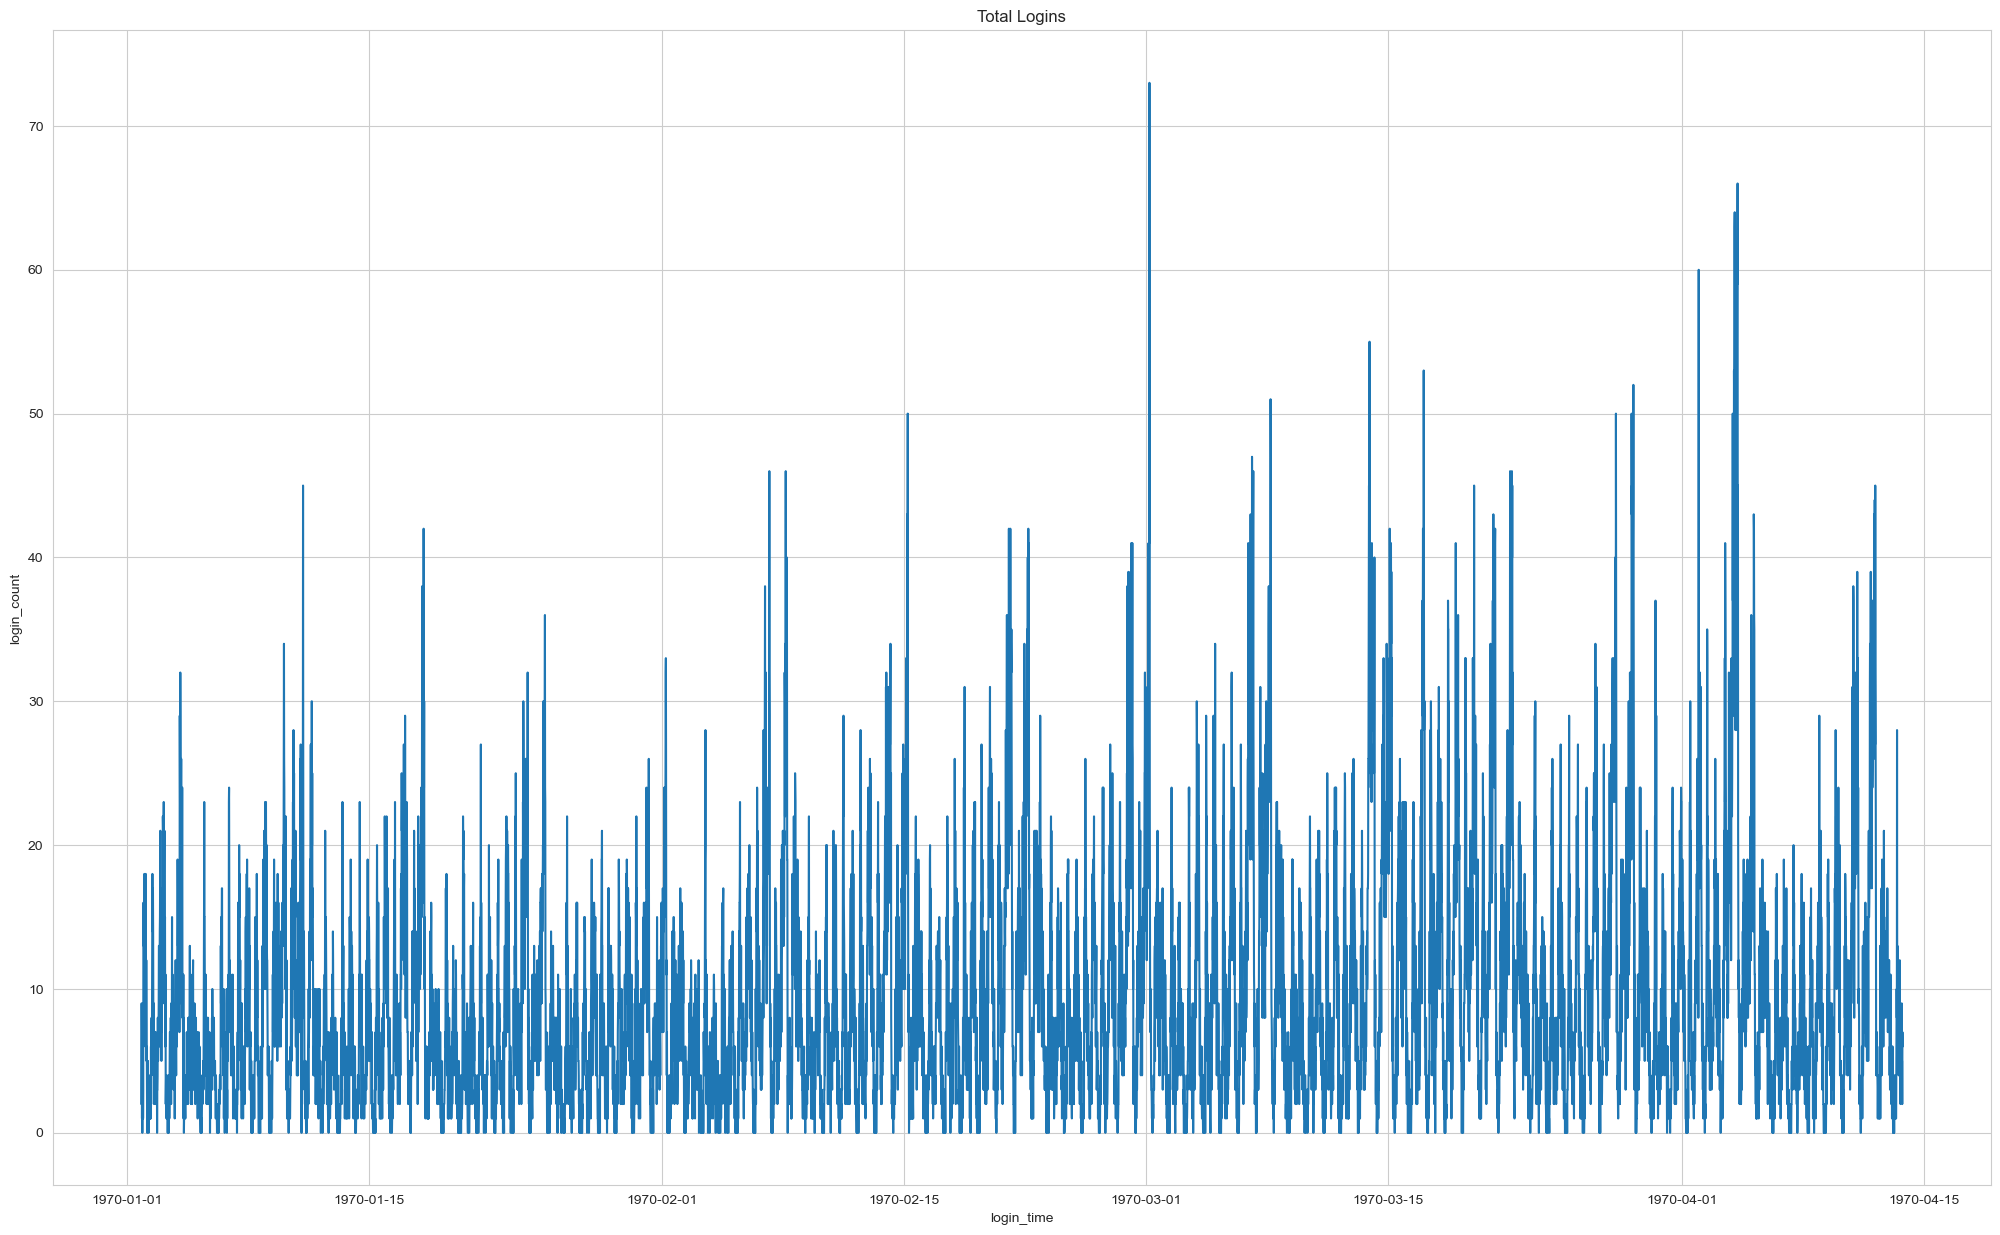

In [10]:

_ = sns.lineplot(data=logins_15, x='login_time', y='login_count')
_ = plt.title("Total Logins")


Based on this time series graph of logins over the 4 month period, there seems to be a regular sinusoidal pattern of logins that cycle through month. 

In [11]:
# set period to 96 for 15 minute intervals
decomposition = sm.tsa.seasonal_decompose(logins_15['login_count'], model='additive', period=96)

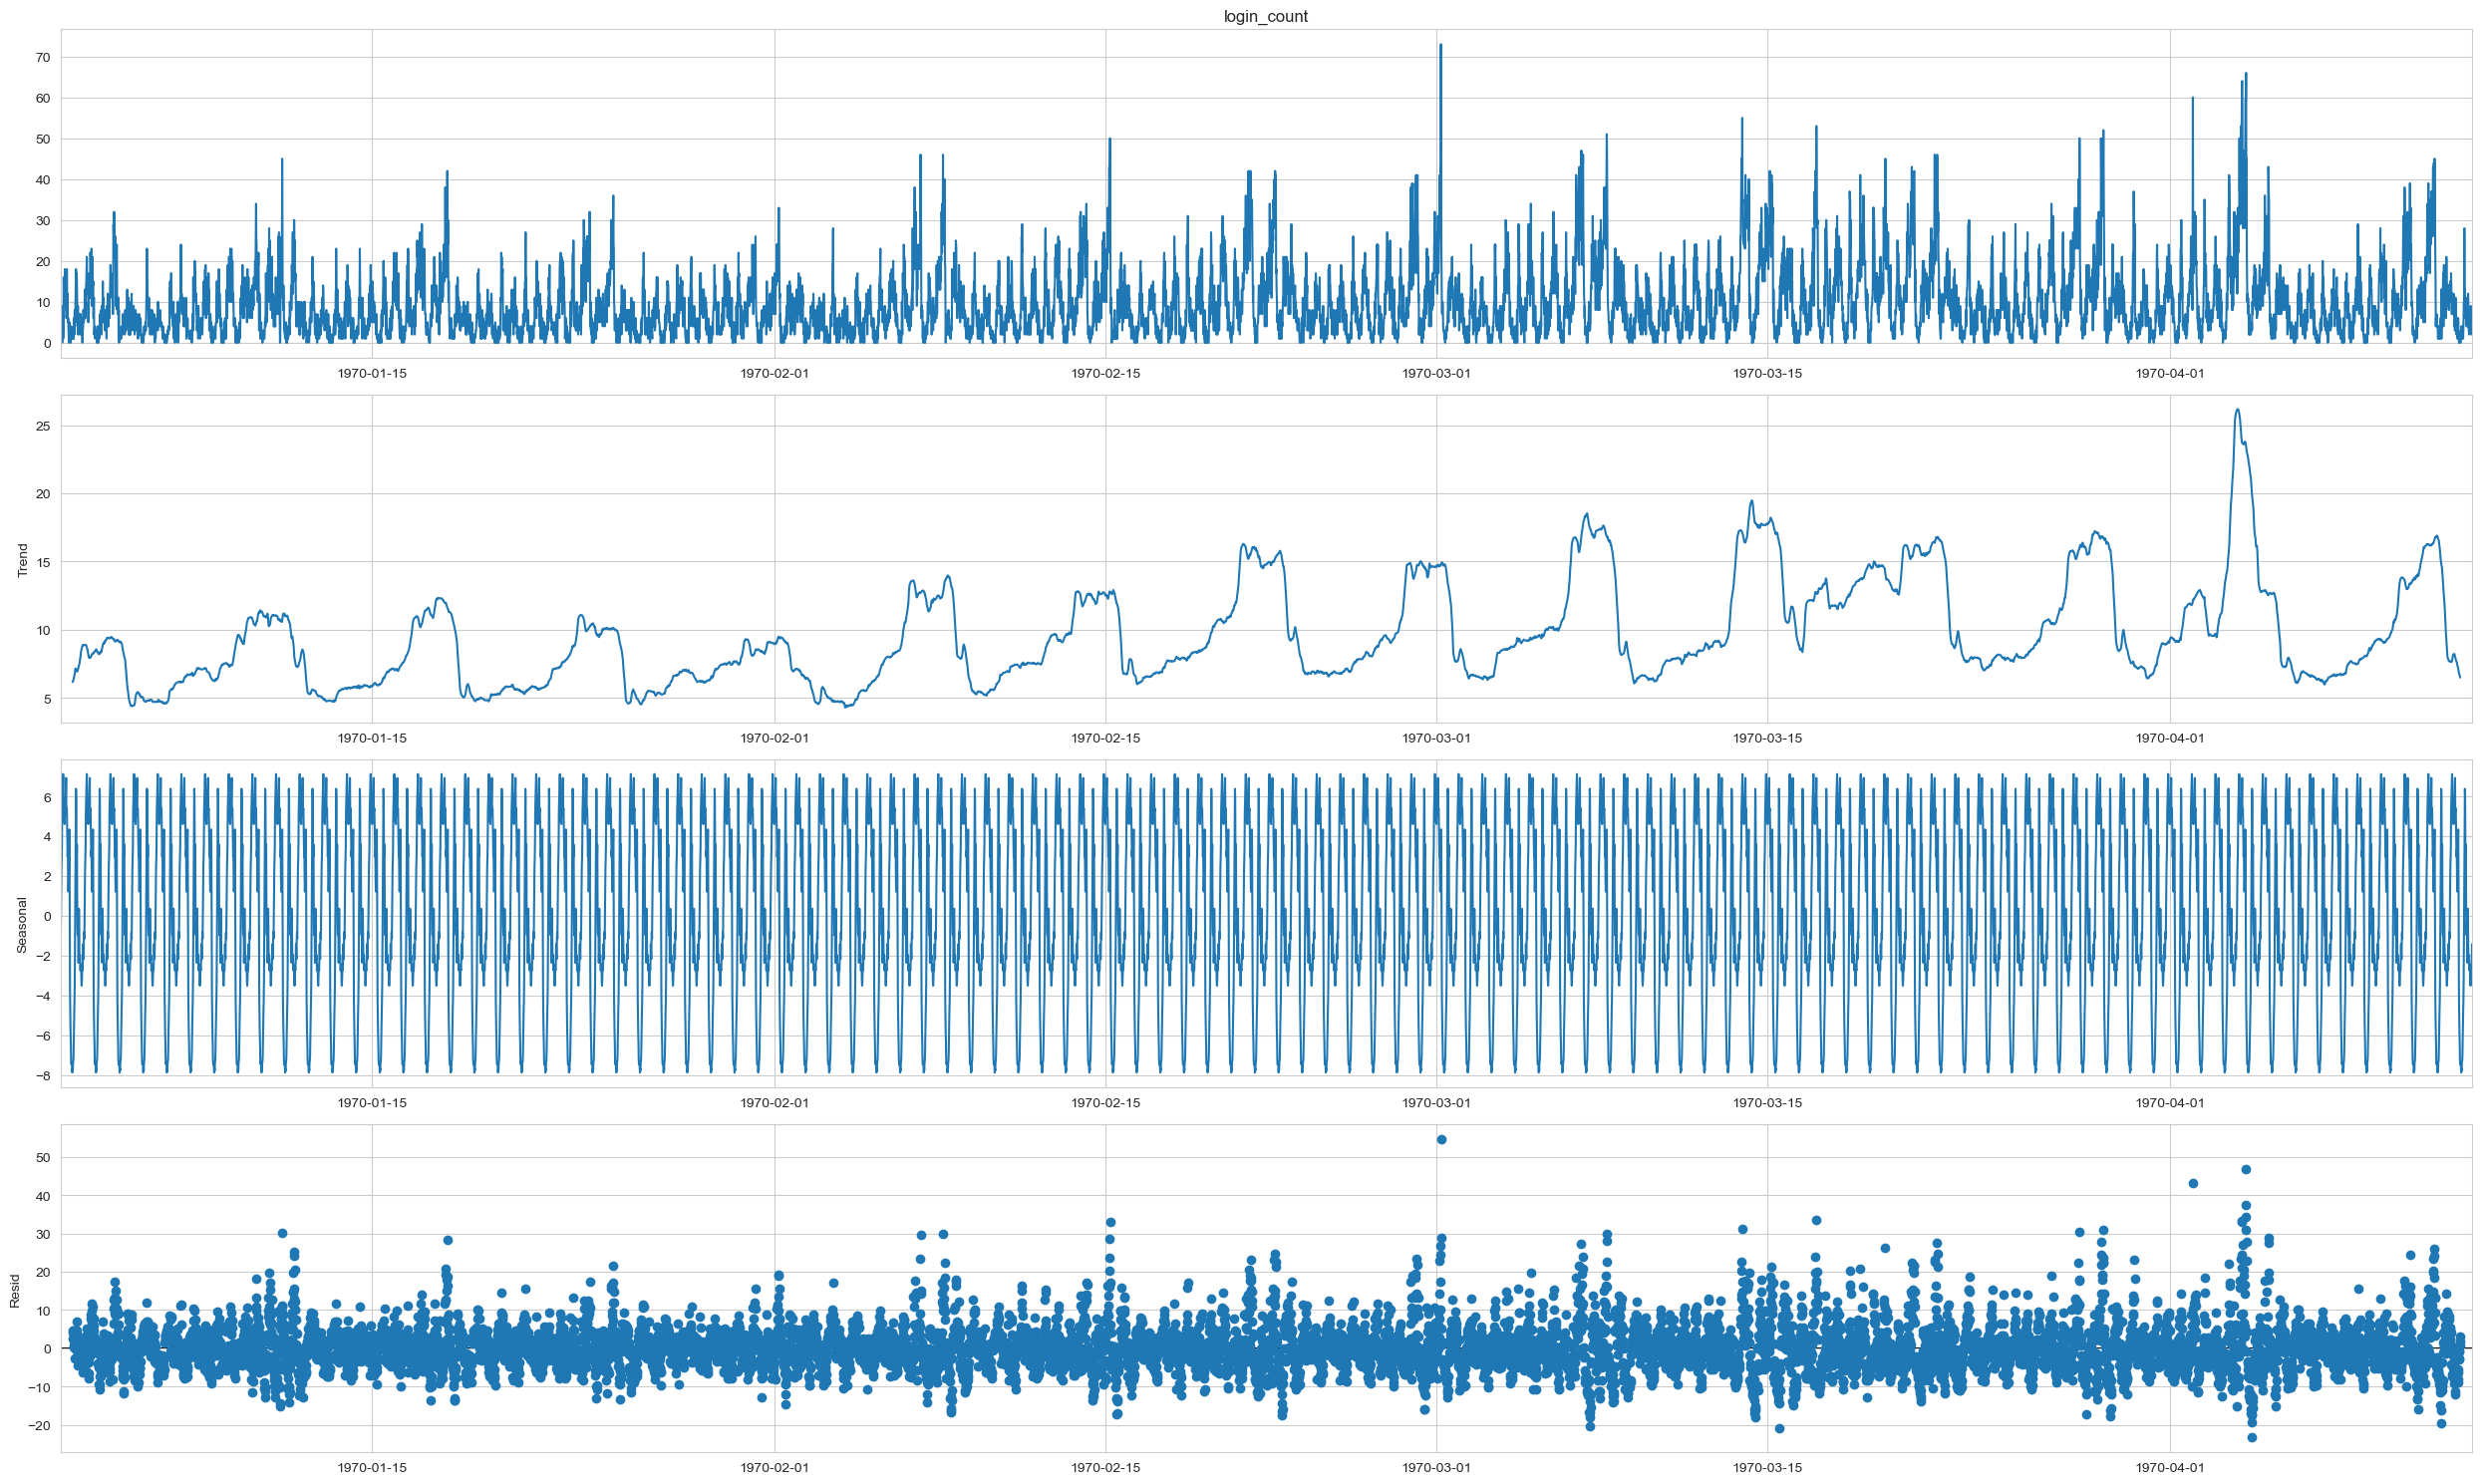

In [12]:
fig = decomposition.plot()

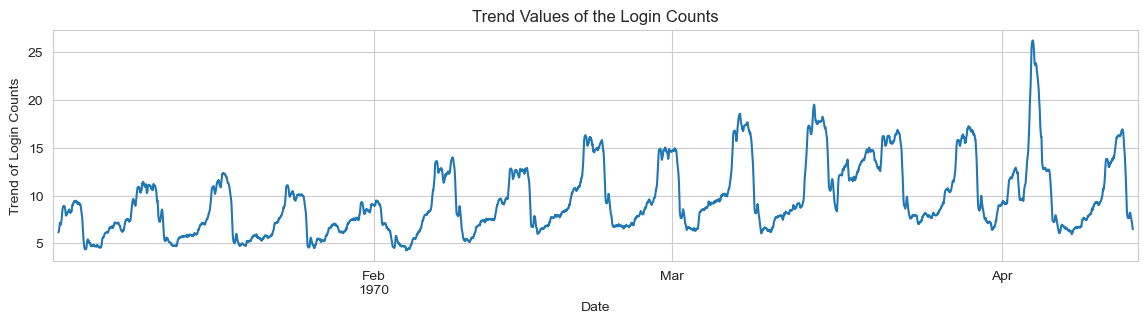

In [13]:
# Trend component in time series
decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(14, 3))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of Login Counts')
ax.set_title('Trend Values of the Login Counts')
plt.show()

This time series plot shows a clearer picture of a consistent trend, that cycles about 4-5 times per month. This suggests that there may be a weekly pattern to logins. 

### Aggregate by Day

In [14]:
logins_15 = logins_15.reset_index()
logins_15 = logins_15.rename(columns={'index': 'login_time'})
logins_15.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [15]:
logins_15['DayofWeek'] = logins_15['login_time'].dt.day_name()
logins_15.head()

,login_time,login_count,DayofWeek
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [16]:
logins_day = logins_15.groupby('DayofWeek', as_index=False).sum()
logins_day

,DayofWeek,login_count
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


Text(0.5, 1.0, 'Logins by Day of the Week')

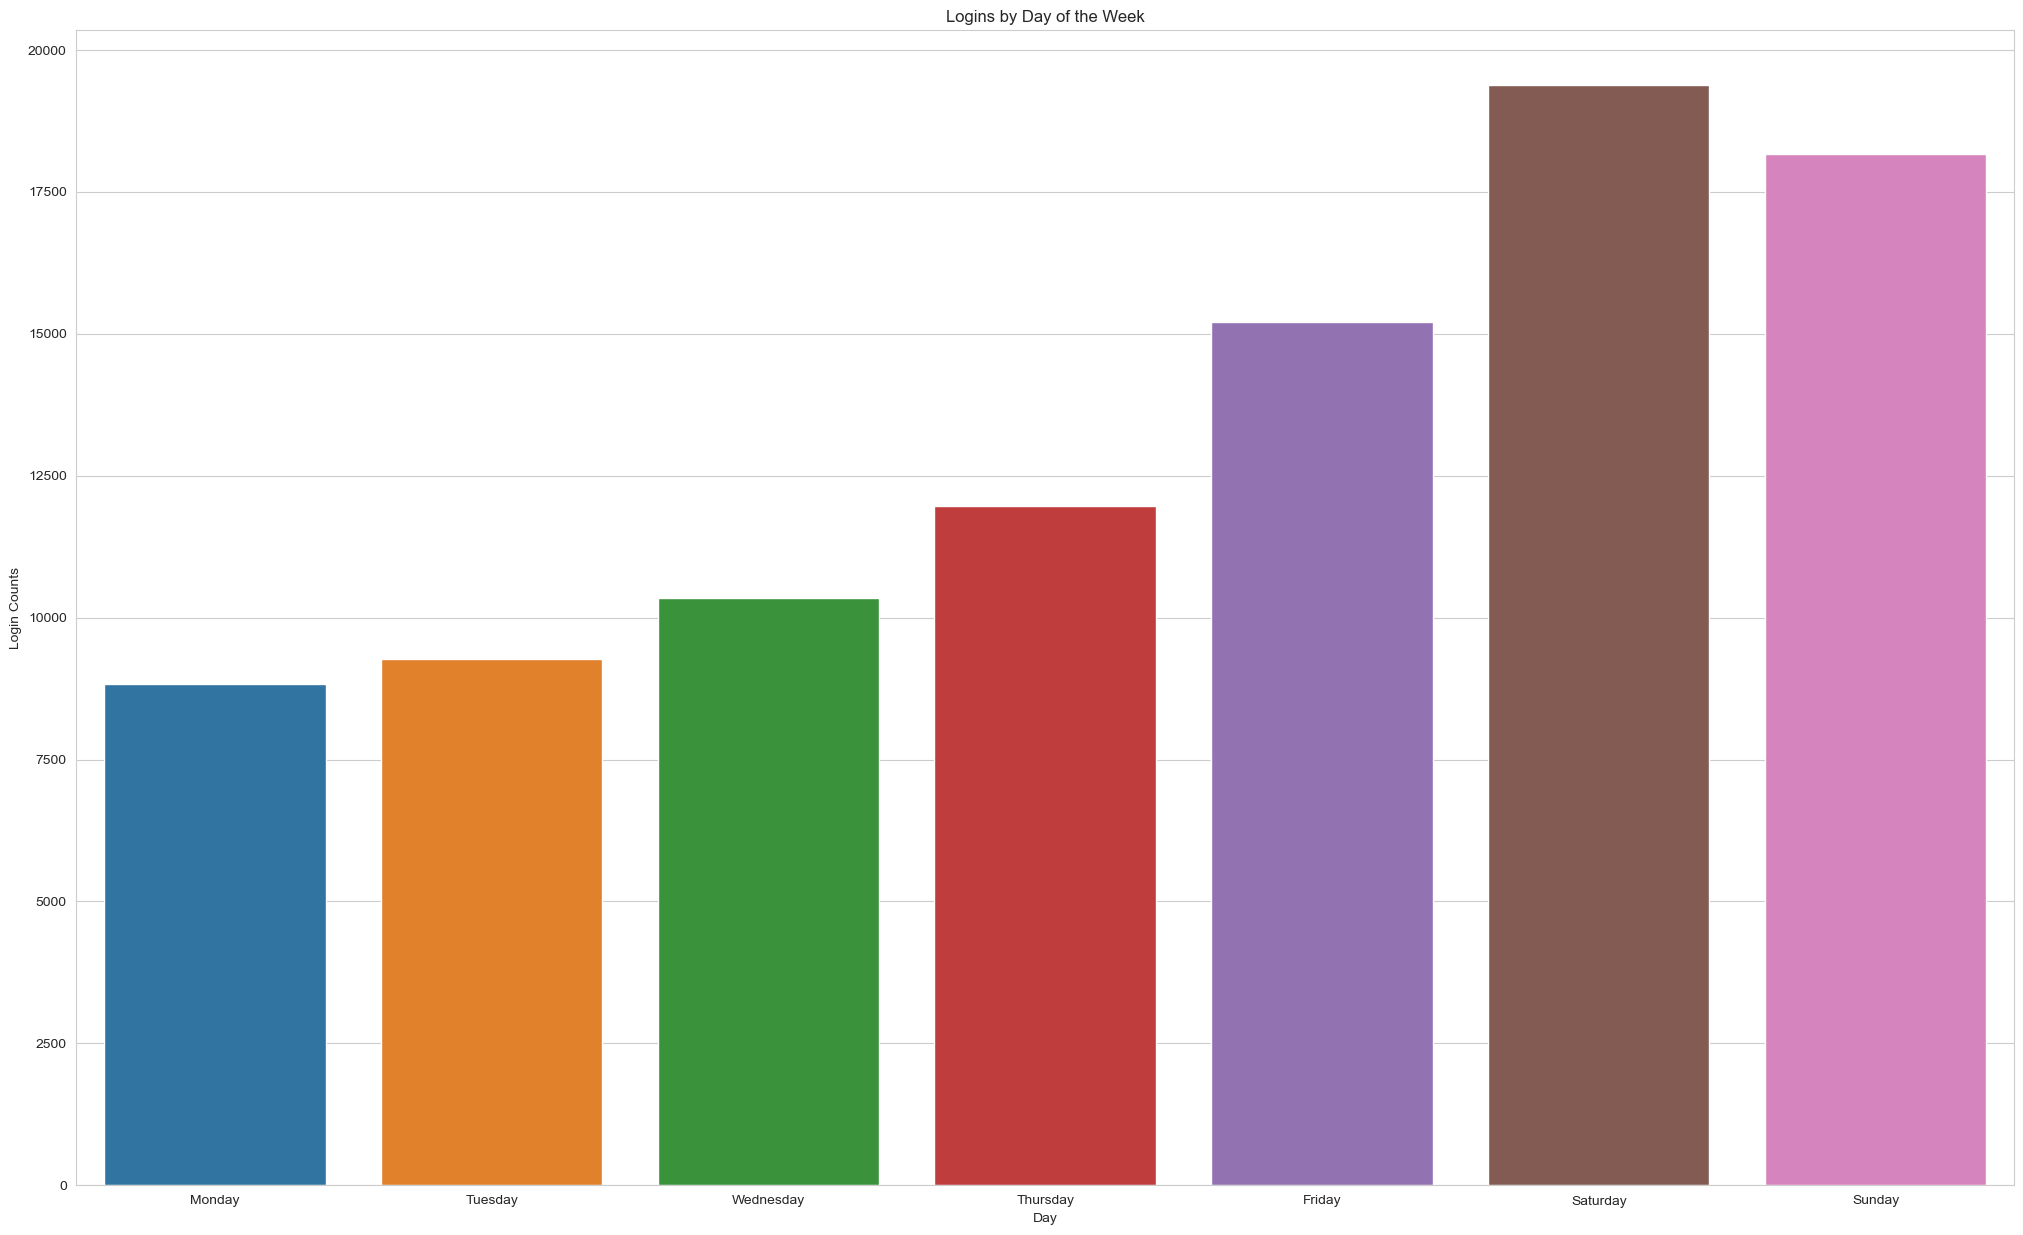

In [17]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# plot bar chart
sns.barplot(x = 'DayofWeek', y = 'login_count', data = logins_day, order=day_order)
plt.xlabel('Day')
plt.ylabel('Login Counts')
plt.title('Logins by Day of the Week')

We can see from this bar chart that the weekend days (Friday, Saturday, & Sunday) have the most logins. The day with the most logins overall is Saturday and the least is Monday. 

### Aggregate by Hour

In [18]:
logins_15['Hour'] = logins_15['login_time'].dt.hour
logins_15.head()

,login_time,login_count,DayofWeek,Hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [19]:
logins_hour = logins_15.groupby('Hour', as_index=False).sum()
logins_hour

,Hour,login_count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


Text(0.5, 1.0, 'Logins by Hour of Day')

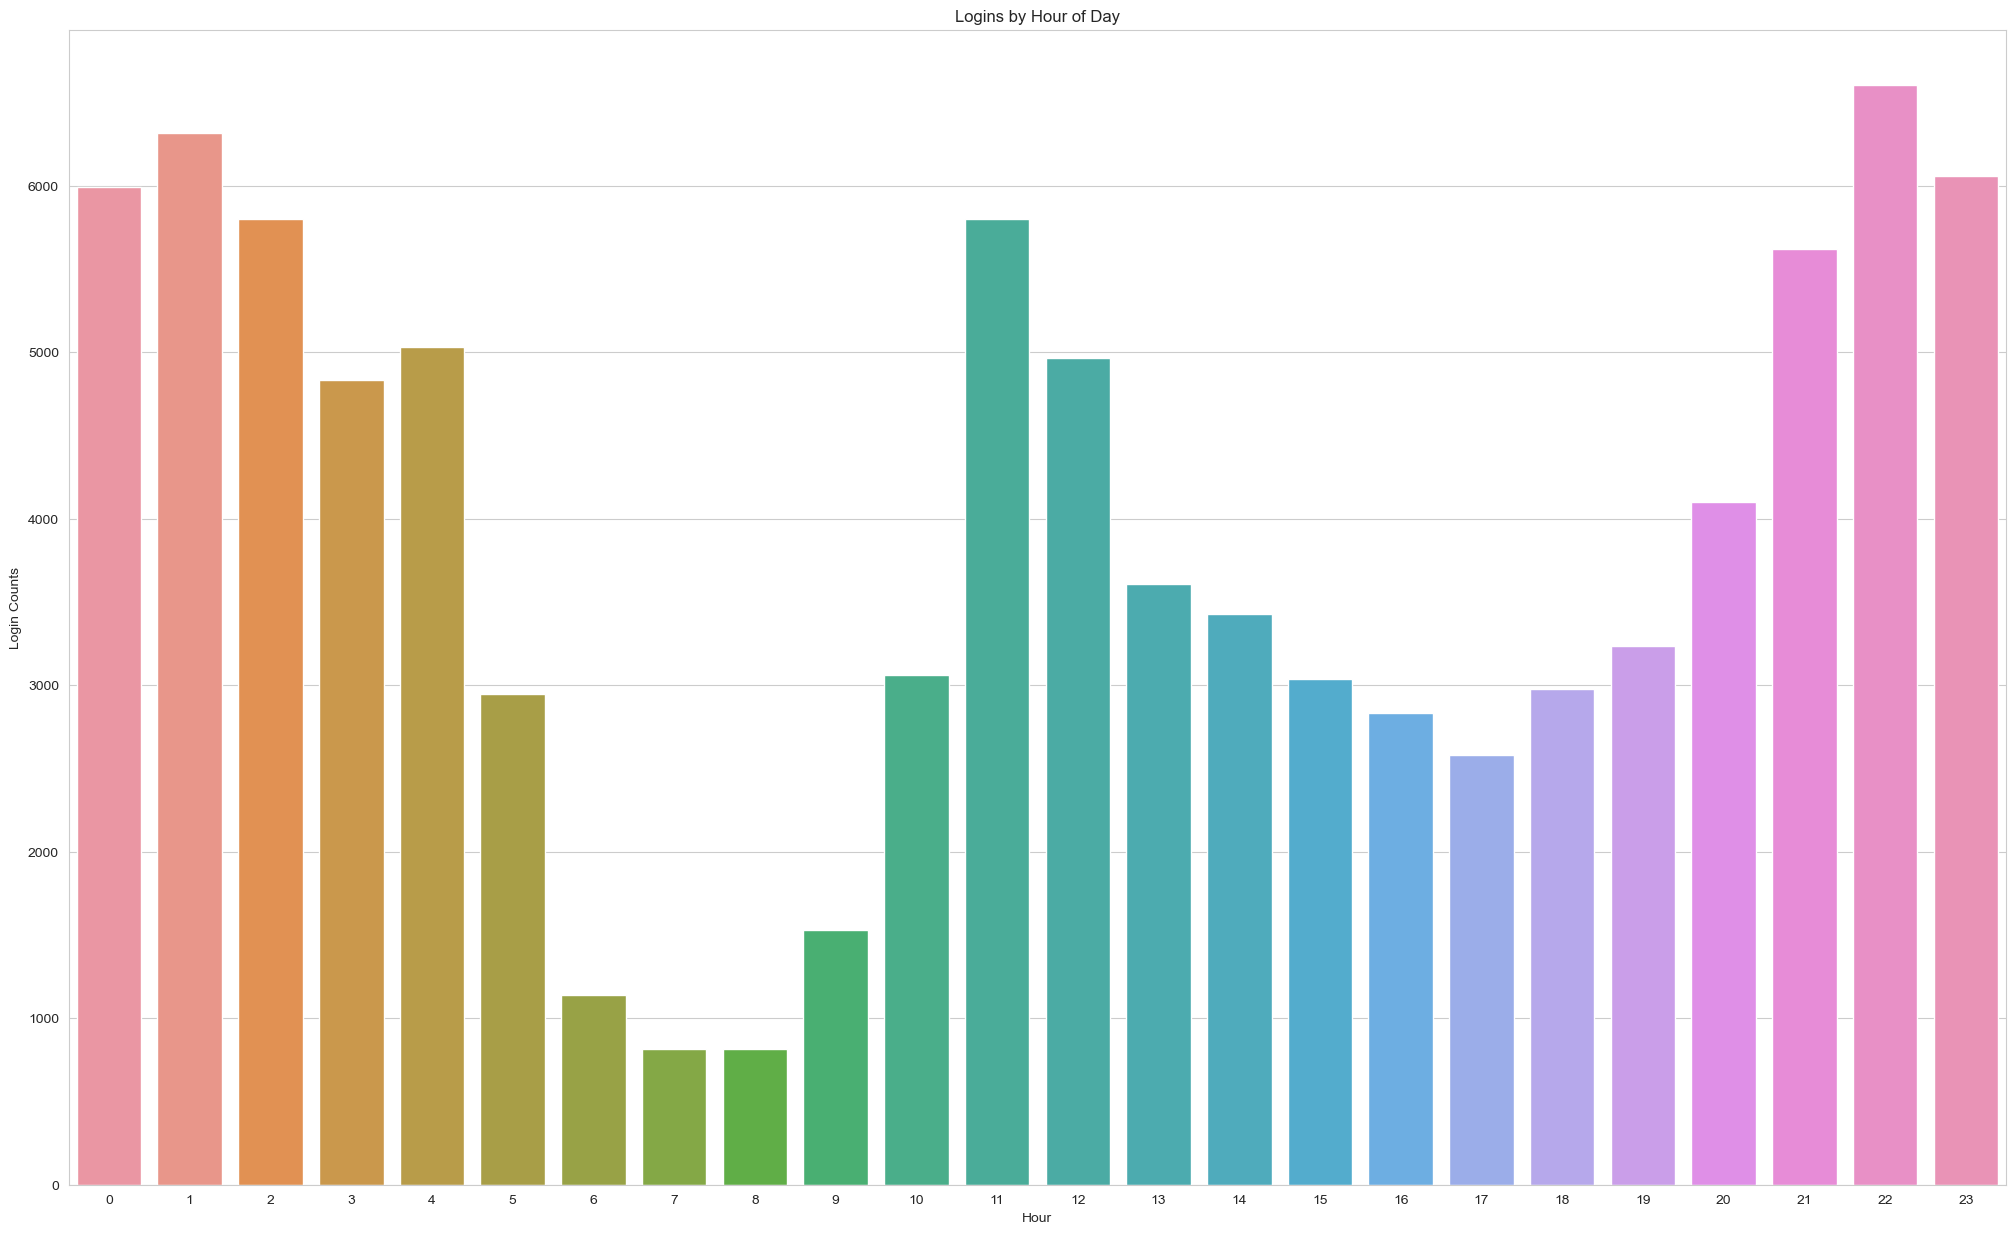

In [20]:
# plot bar chart
sns.barplot(x = 'Hour', y = 'login_count', data = logins_hour)
plt.xlabel('Hour')
plt.ylabel('Login Counts')
plt.title('Logins by Hour of Day')

Based on this bar chart of the logins by hour of the day, the most logins occur late at night (9PM - 2AM) and then there is a midday surge around 11AM-12PM. The hour of the day with the most logins overall is at 10PM. The time period of the day with the lowest number of logins is early morning around 6AM-9AM. 

# Part 2 - Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

***1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?***

**Answer:** The key measure of success for this experiment would be measuring the average number of tolls incurred by an individual driver partner. Since the aim of our experiement is to encourage driver partners to serve both cities, each time a toll is charged to a driver should indicate that the driver switched cities. We also want to base our measure on the average of each individual driver rather than the total number of toll costs because we want to know if the driving behavior of an individual driver changes due to the reimbursement. Furthermore, this means the metric would be less affected by individual drivers skewing the data. For example, the reimbursement program may be wrongly perceived as being successful if there are many reimbursements, but in actuality, only a handful of active drivers are serving both cities.  

***2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:***

- a) how you will implement the experiment 

**Answer:** In order to compare of the effectiveness of the toll reimbursement program, I would implement a pre-experimental design. I would first collect data on the average number of tolls incurred by driver partners over a 2 month period before the reimbursement program is offered. Then, I would implement the toll reimbursement program and roll out the experiement over a 2 month period and measure the average number of tolls incurred by individual drivers over that period when toll costs are reimbursed. Finally, I would compare the two time period to observe if there is a change in the average number of tolls incurred by driver partners. 

***Null Hypothesis:*** There is no difference in the average number of tolls incurred by driver partners when comparing the periods with the toll reimbursement program with the period without the toll reimbursement program. 

***Alternative Hypothesis:*** The average number of tolls incurred by driver partners is significanty greater in the period with the toll reimbursement program compared with the period without the toll reimbursement program. 

- b) what statistical test(s) you will conduct to verify the significance of the observation

**Answer:** I would perform a paired sample t-test to observe if there is a significant mean difference in the average number of tolls incurred by drive partners before and after the reimbursement program is implemented. The statistical significance will be determined by using a p-value of 0.05 to see if there is a signficant difference in the toll bridge usage after the reimbursement program is implemented. 

- c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Answer:** We would accept the alternative hypothesis and reject the null hypothesis if there is a statistically significant increase in the average number of tolls incurred by driver partners once the reimbursement program is implemented. Furthermore, I would consider the experiement a success if are able to accept the alternative hypothesis. The caveat is that although our assumption is that the toll bridge is what is causing driver partners to be exclusive to each city, there may be other reasons why drivers may be exclusive to a city such as a driver being more familiar with a certain city's driving routes or time availabilty. 


# Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

### Data Description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

## Data Wrangling

In [21]:
# Load data 
df = pd.read_json('ultimate_data_challenge.json', convert_dates=['signup_date', 'last_trip_date'])

In [22]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [24]:
df.shape

(50000, 12)

### Missing Values

In [25]:
# look at avg_rating_of_driver column
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [26]:
# look at avg_rating_by_driver column
df['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [27]:
# Fill in missing data in 'avg_rating_of_driver' and 'avg_rating_by_driver' with mean
df[['avg_rating_of_driver', 'avg_rating_by_driver']] = df[
    ['avg_rating_of_driver', 'avg_rating_by_driver']].fillna(df[['avg_rating_of_driver', 'avg_rating_by_driver']].mean())

In [28]:
# Fill in missing phone values with mode
df['phone'] = df['phone'].fillna(df['phone'].mode().iloc[0])

In [29]:
df.isna().sum().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

## Feature Engineering

We need to first identify which users are were are 'retained'.

As stated in the instructions, a user is considered **retained** if they were "active" (i.e. took a trip) in the preceding 30 days. 

Since we do not know when the data was collected, we will first need to identify the most recent user trip date and then identify which users were 'active' or took a trip in the preceding 30 days of that date. 

In [31]:
# Identify most recent trip date in dataset
current_date = np.max(df.last_trip_date)
print(current_date)

2014-07-01 00:00:00


Since the most recent date is July 01, 2014, we will consider users as retained if they last took a trip in the preceding 30 days before that date. 

In [32]:
# Identify which users were retained
df['retained'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)

In [33]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [34]:
# Check proportion of users retained
df['retained'].value_counts()

0    31196
1    18804
Name: retained, dtype: int64

Text(0.5, 1.0, 'Non-Retention vs. Retention Users')

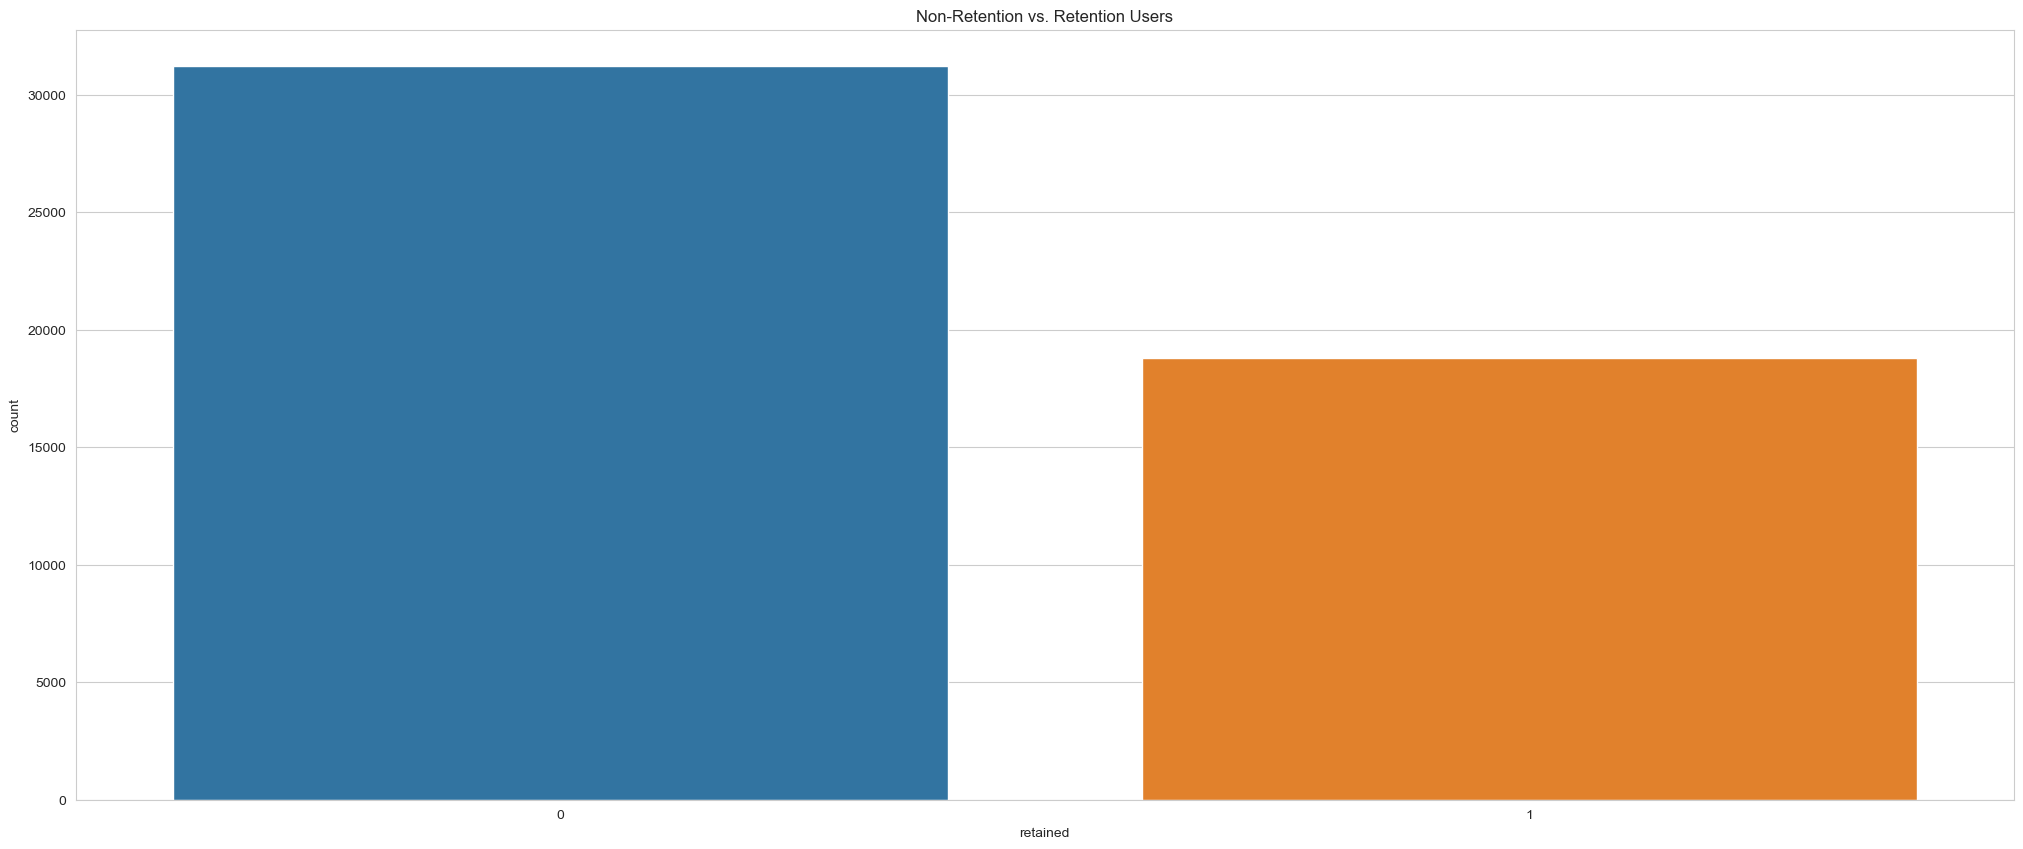

In [35]:
# Visualize distrubtion of retained vs non-retained
fig = plt.figure(figsize=(25,10)) 
sns.countplot(x='retained', data=df)
plt.title("Non-Retention vs. Retention Users")

In [36]:
# Retention Rate
retention_rate = (18804 / 50000) * 100
print(f"Retention Rate: {retention_rate: .2f}%")

Retention Rate:  37.61%


## EDA

In [37]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
retained                           int64
dtype: object

### Check Unique Values for Categorical Features

In [38]:
# Check city
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [39]:
# Check phone
df['phone'].value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [40]:
# Check ultimate_black_user
df['ultimate_black_user'].value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [41]:
# Get basic summary statistics for each numerical column feature
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


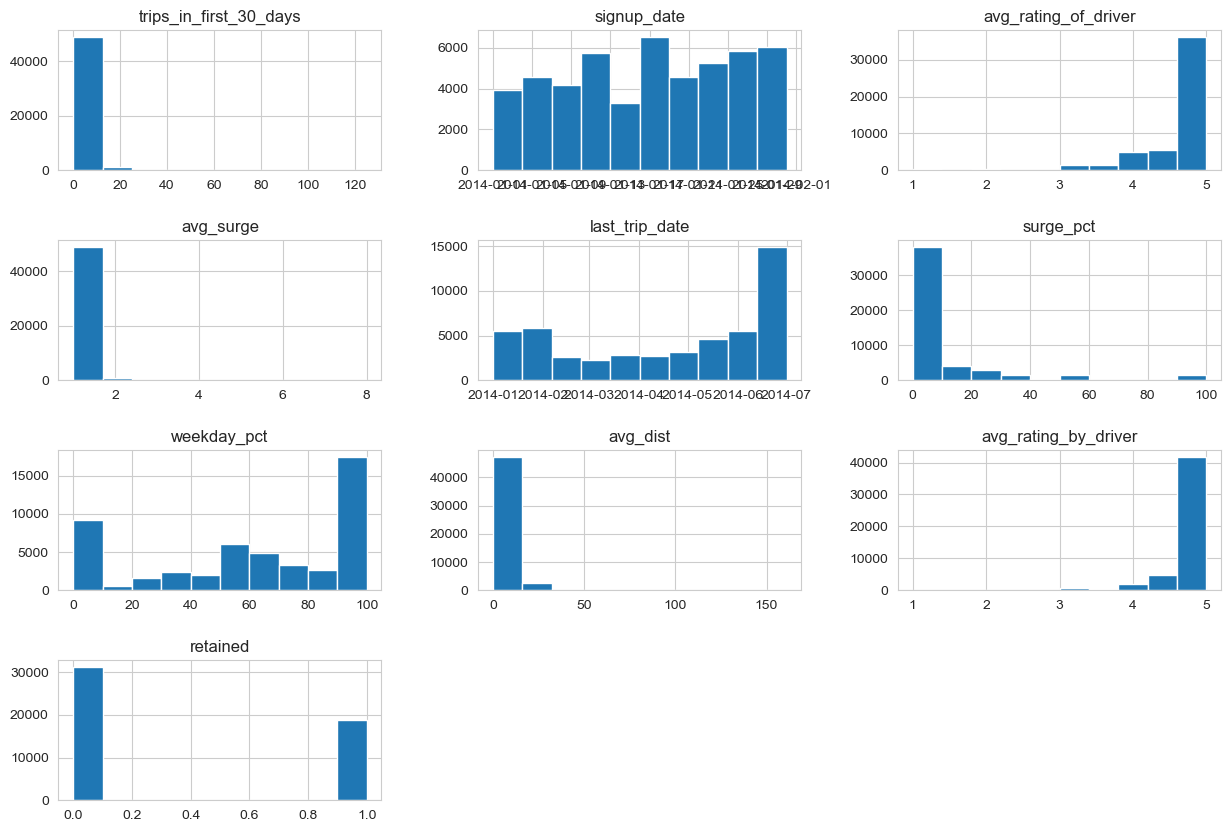

In [42]:
# Review distribution of data by viewing histrogram subplots
_ = df.hist(figsize=(15,10))
_ = plt.subplots_adjust(hspace=0.5);

Initial EDA of numerical features revealed that some features are tail-heavy such as avg_rating_of_driver and surge_pct. 

Text(0.5, 1.0, 'Cities vs. Retention')

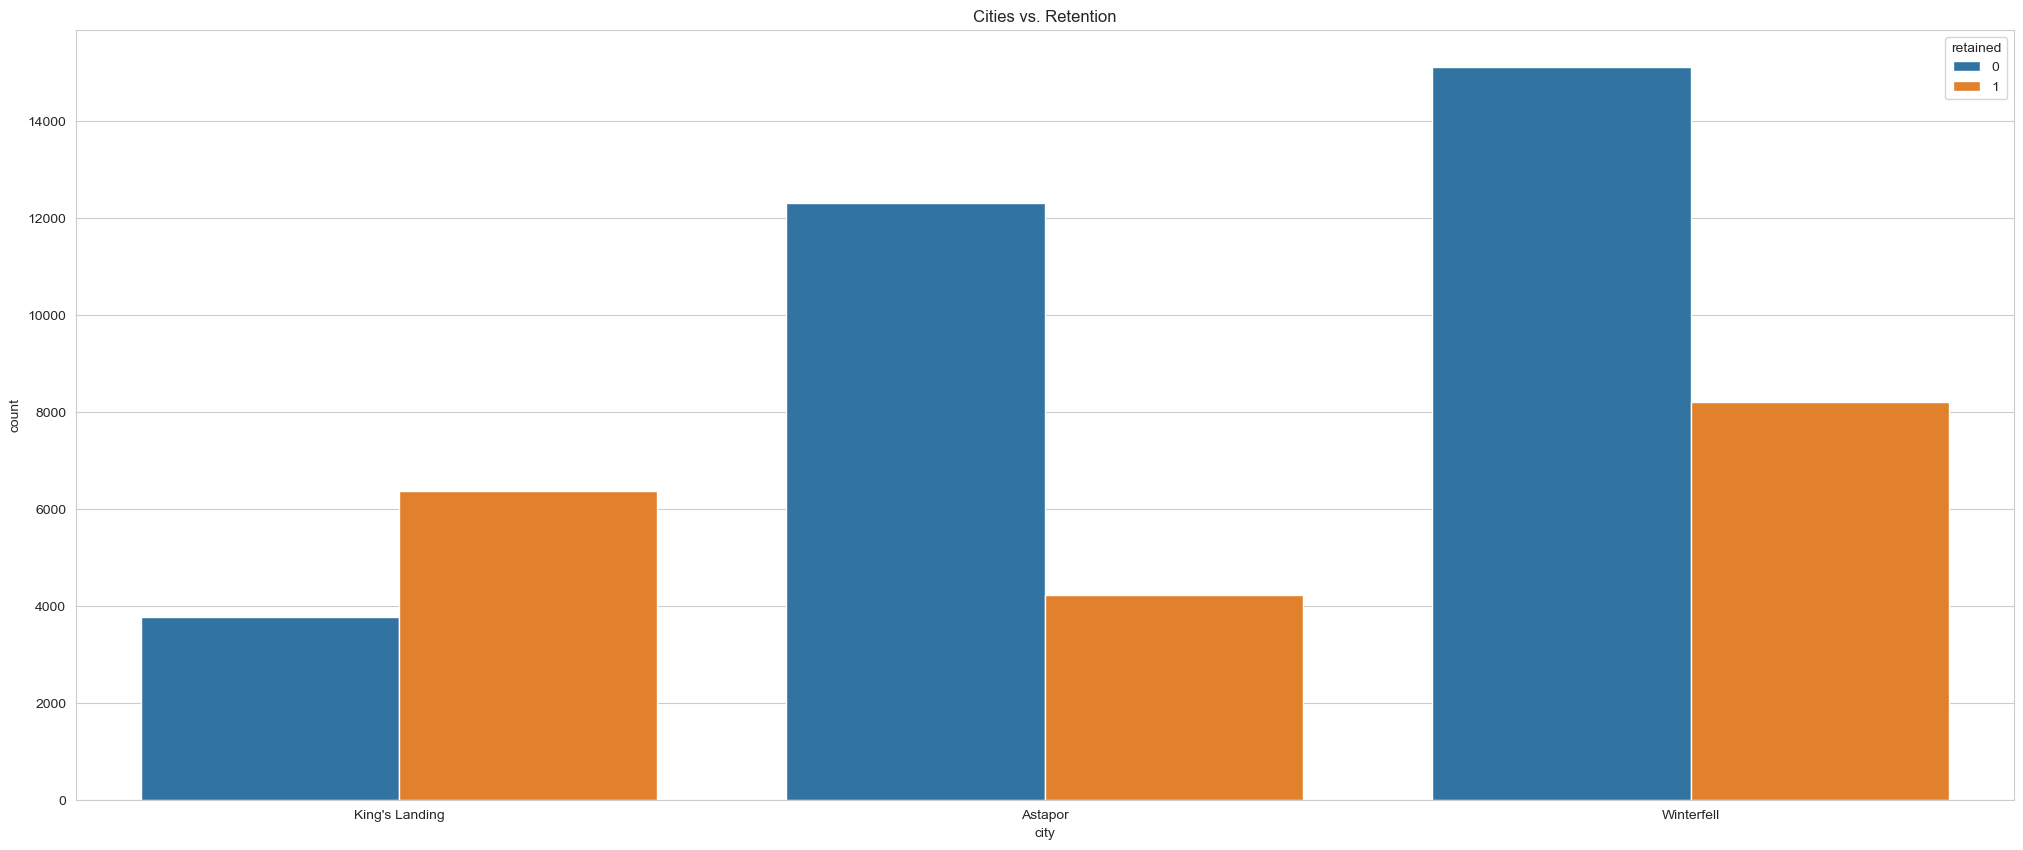

In [43]:
# Check user retention vs. city
fig = plt.figure(figsize=(25,10))
sns.countplot(data=df, x='city', hue='retained')
plt.title('Cities vs. Retention')

Compared to the other cities, the majority of users at King's Landing are retained. While in Astapor, the lowest proportion of users are retained. 

Text(0.5, 1.0, 'Phone vs. Retention')

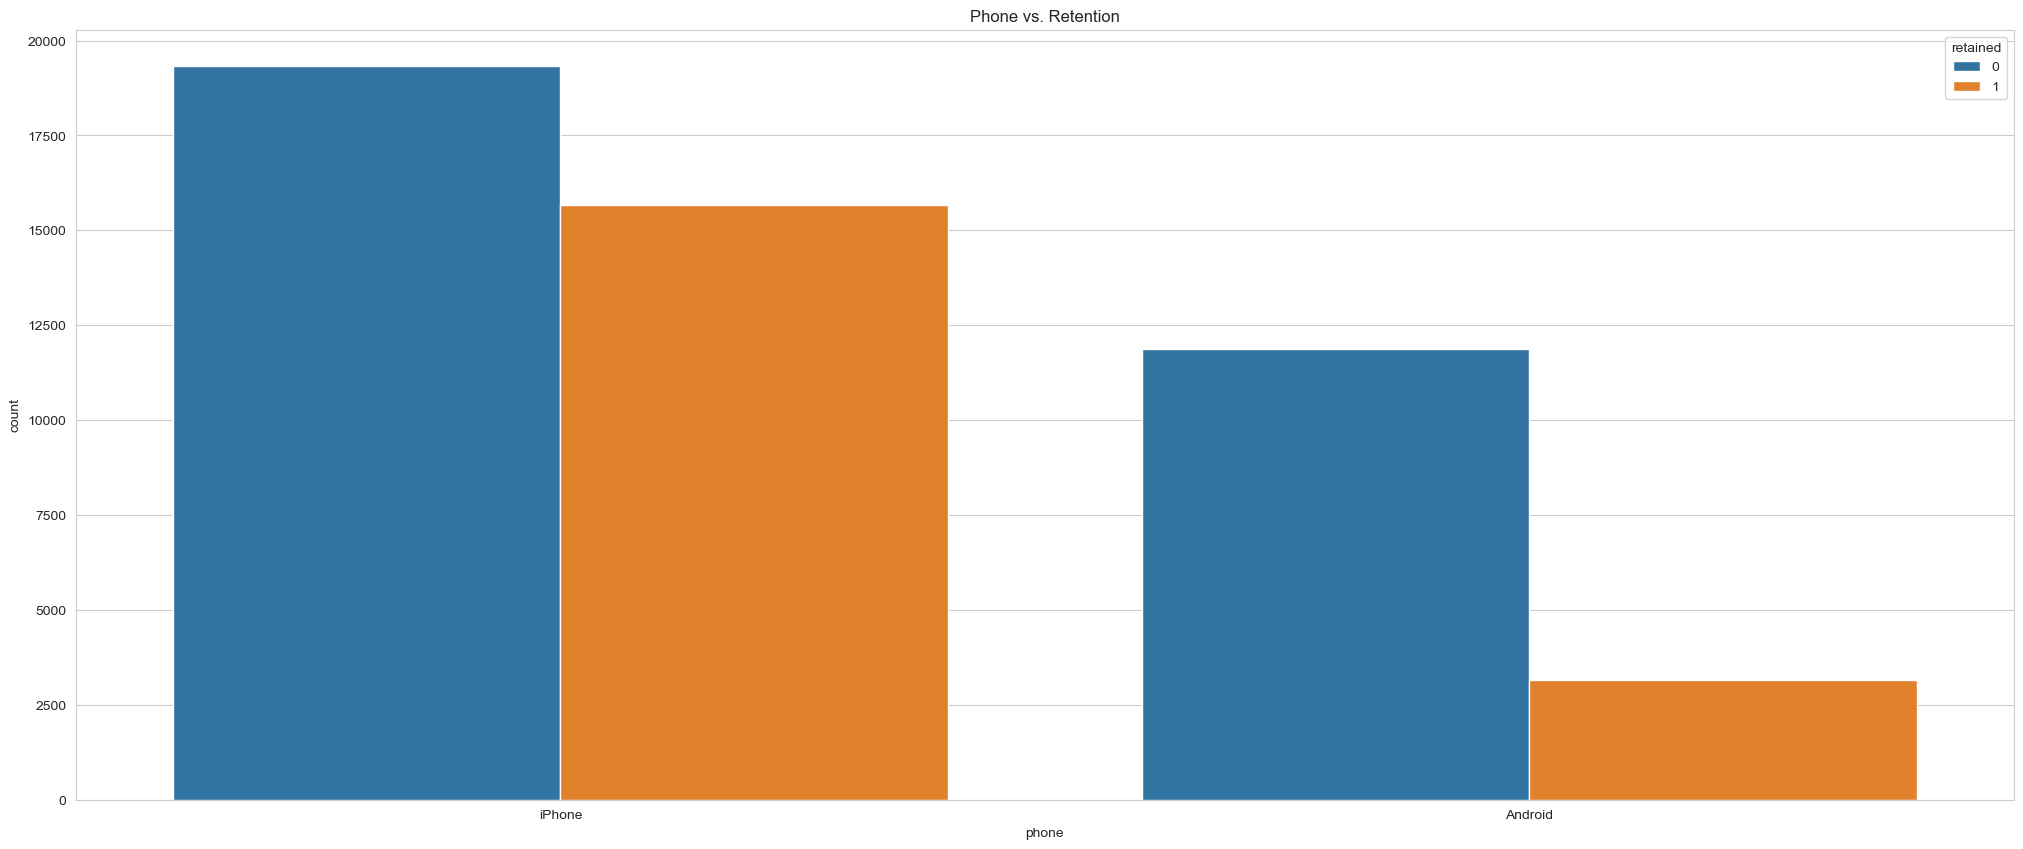

In [44]:
# Check user retention vs. phone
fig = plt.figure(figsize=(25,10))
sns.countplot(data=df, x='phone', hue='retained')
plt.title('Phone vs. Retention')

Text(0.5, 1.0, 'Ultimate Black User vs. Retention')

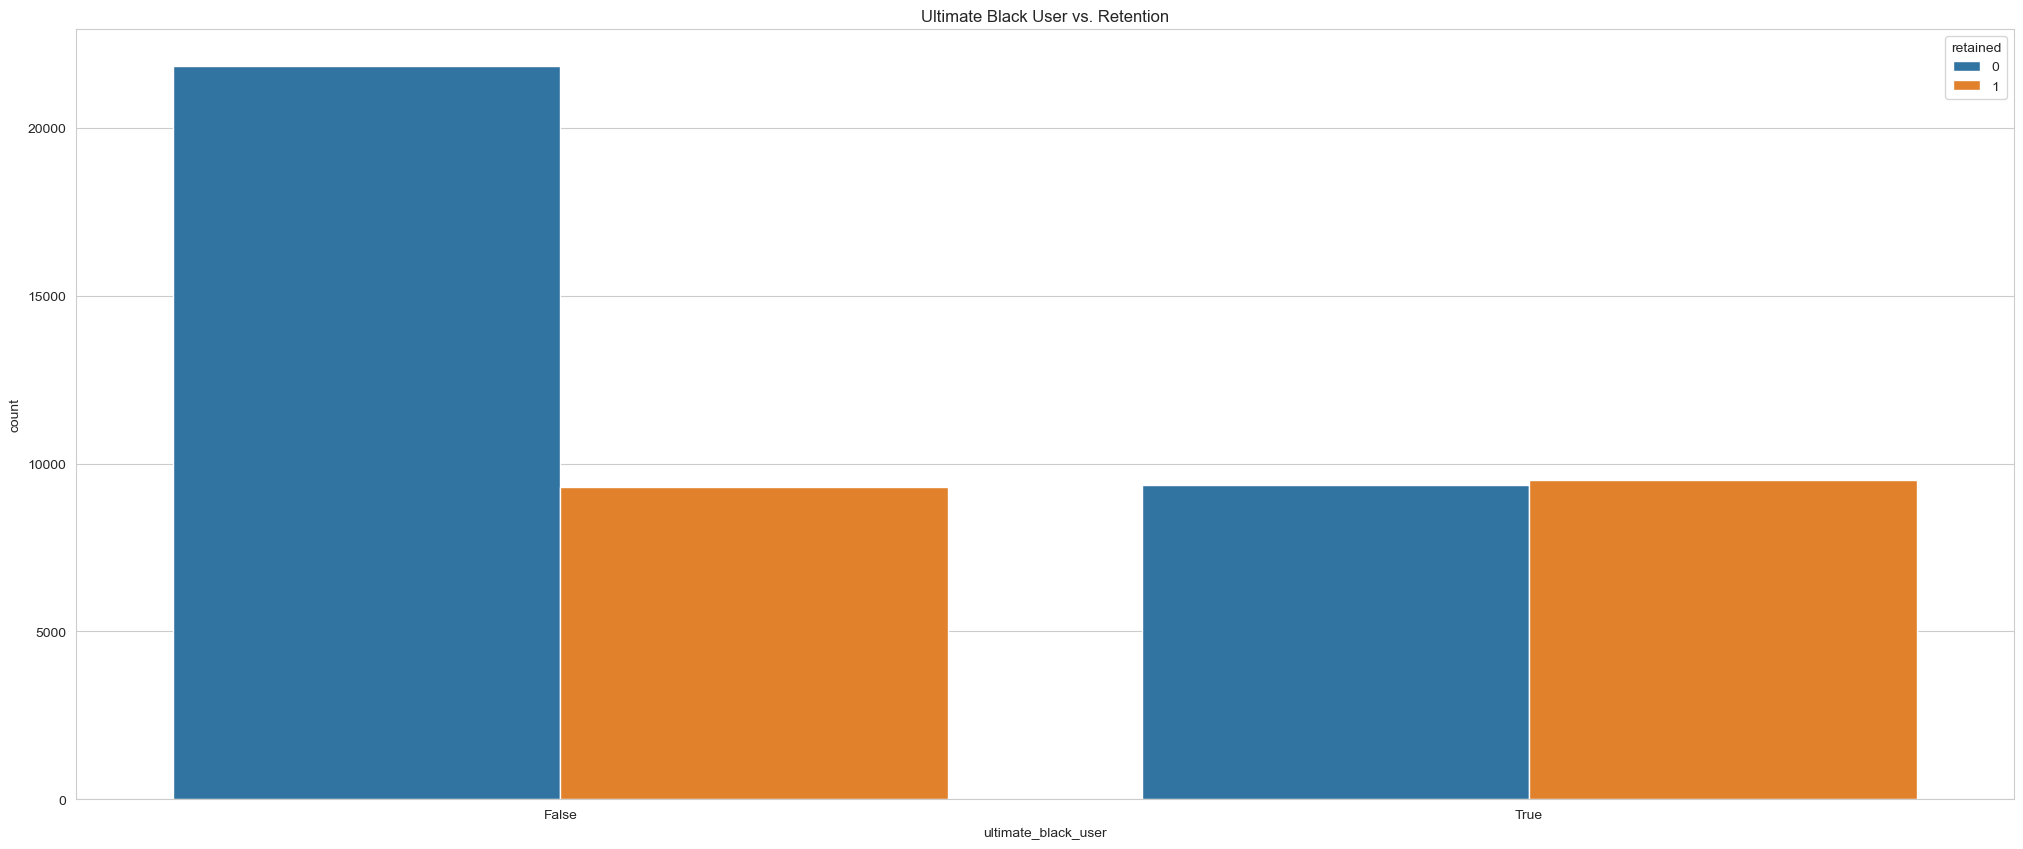

In [45]:
# Check user retention vs. ultimate black user
fig = plt.figure(figsize=(25,10))
sns.countplot(data=df, x='ultimate_black_user', hue='retained')
plt.title('Ultimate Black User vs. Retention')

### Feature Correlation

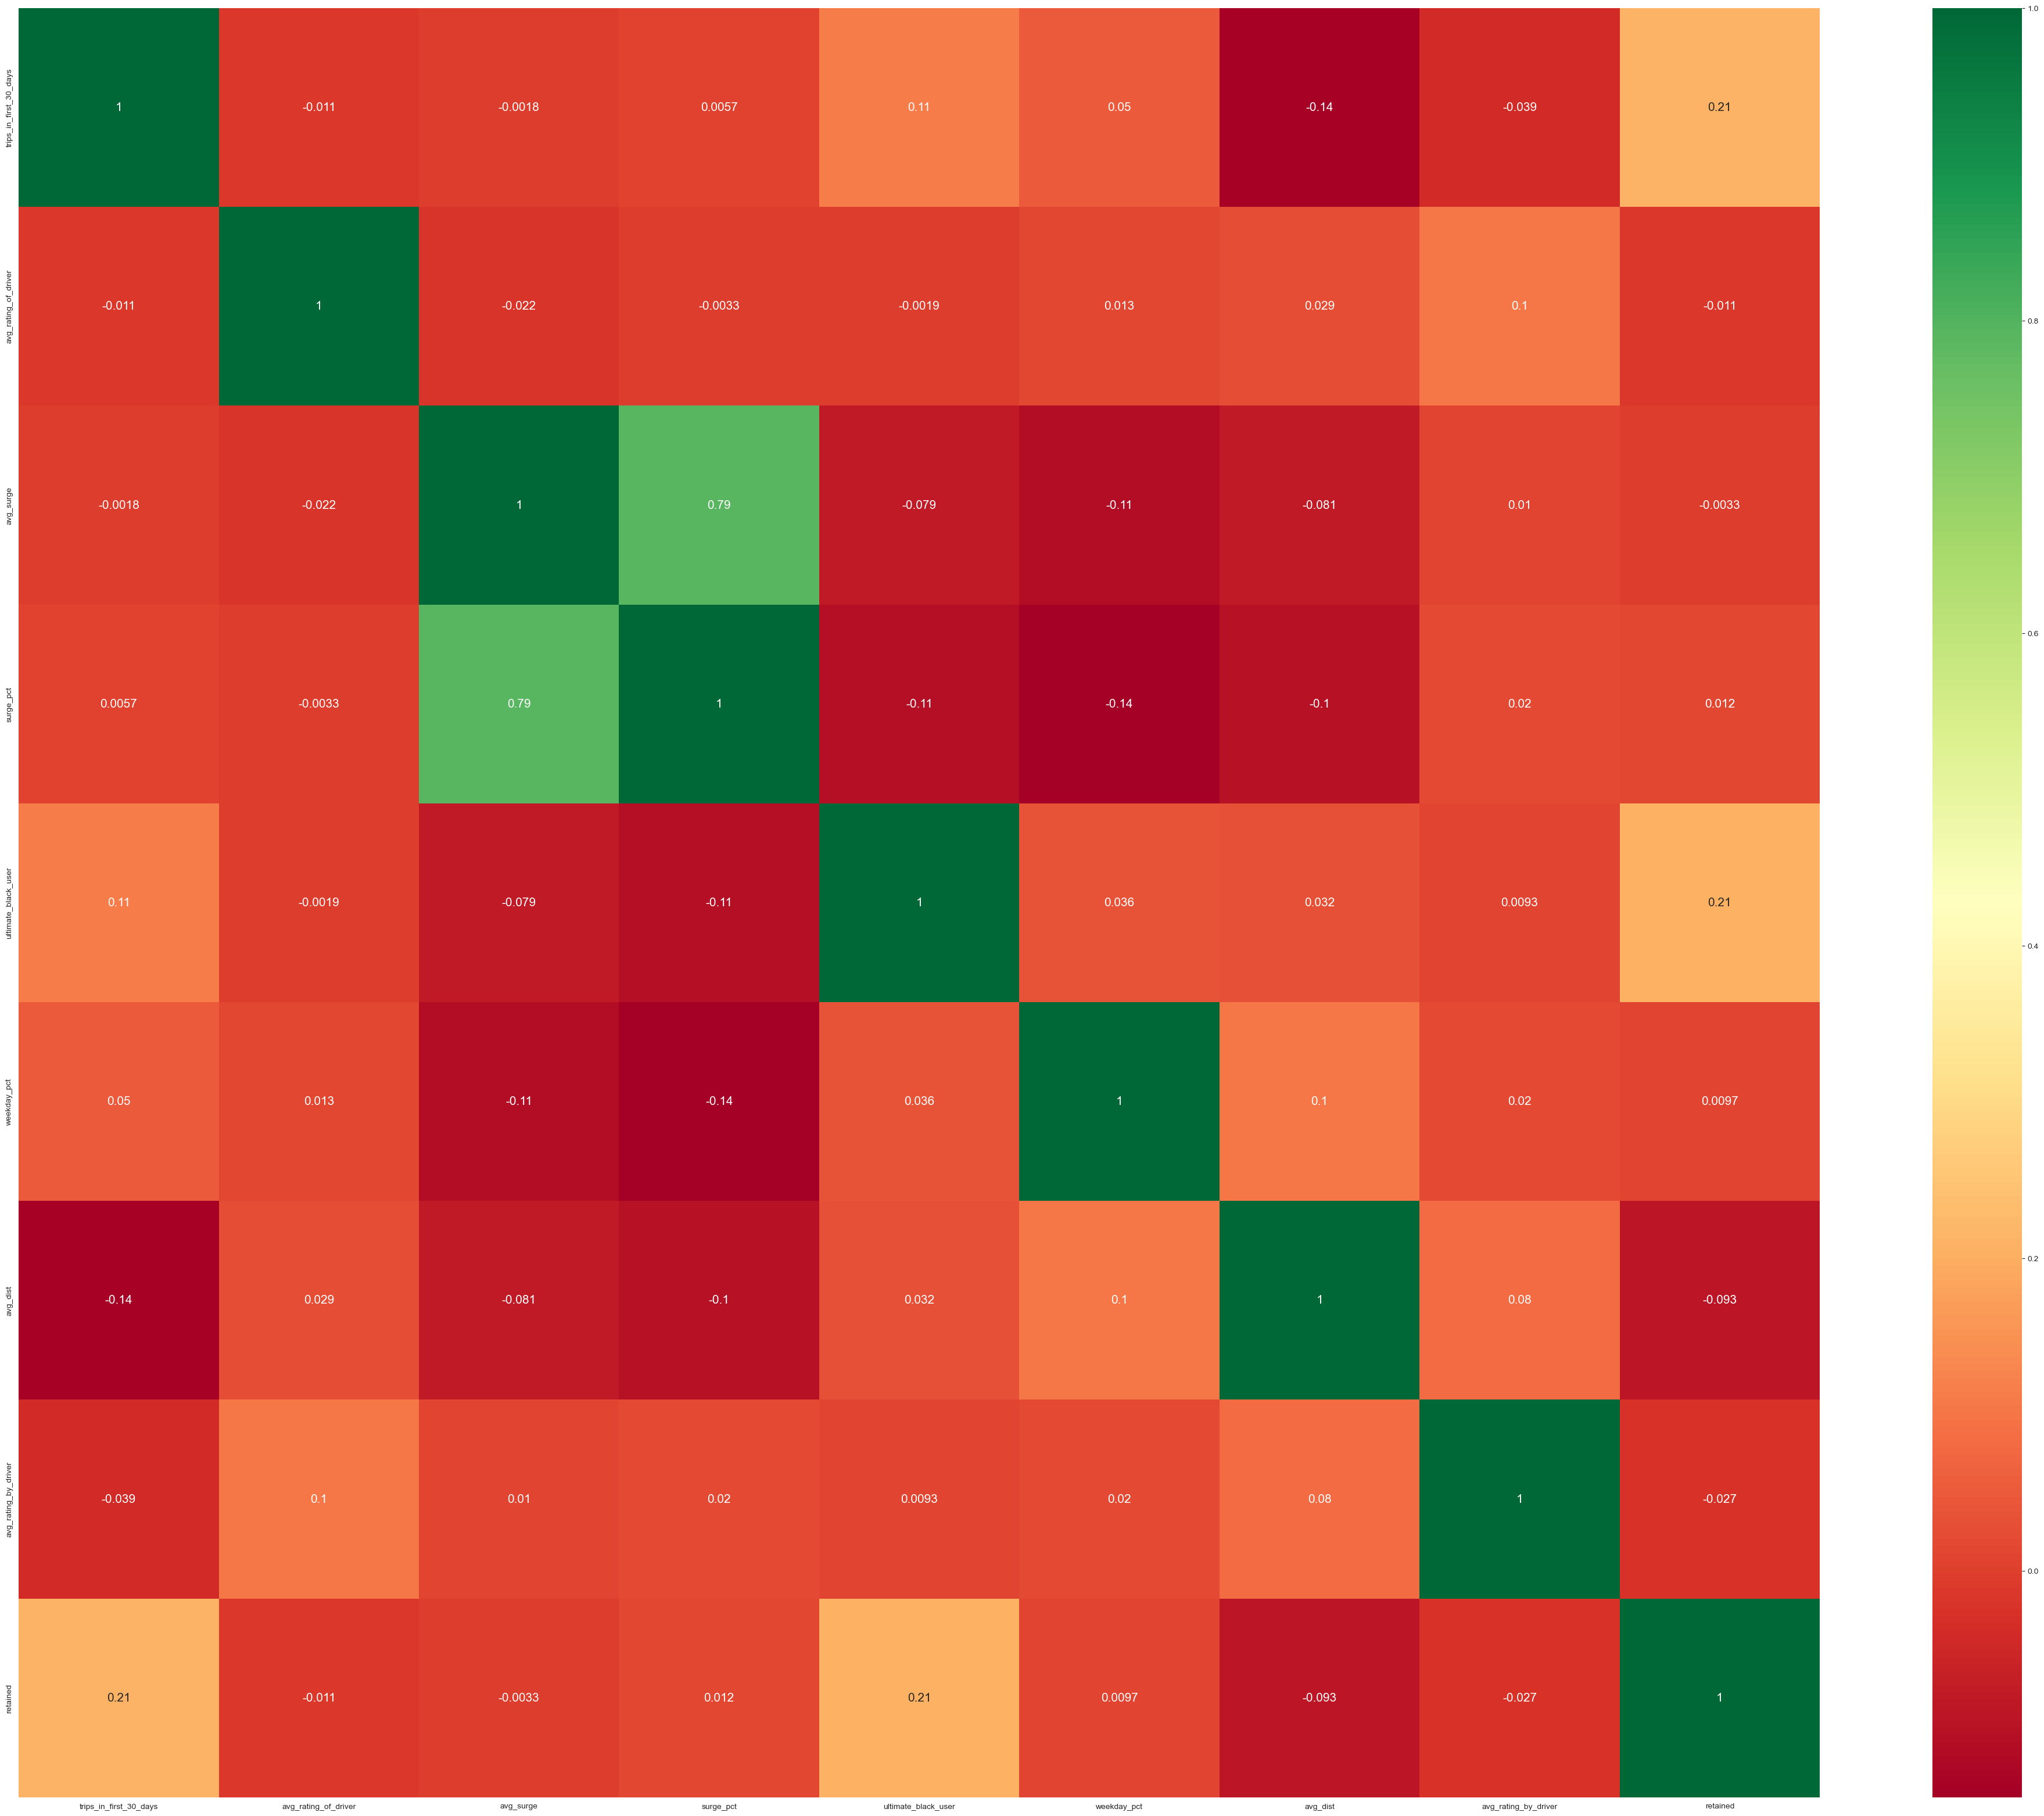

In [46]:
#Make heatmap of data to visualize correlations
_ = plt.subplots(figsize=(50, 40))
_ = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

The only features that had a strong correlation were surge_pct and avg_surge. The only features with any considerable correlation with a user's retention are trips_in_first_30_days and ultimate_black_users. However, these are relatively weak correlations at 0.21.

## Pre-processing and Training

In [47]:
# drop datetime columns
df2 = df.drop(columns=['signup_date', 'last_trip_date'])

In [48]:
df2.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [49]:
df2.shape

(50000, 11)

In [50]:
df2.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
retained                    int64
dtype: object

In [51]:
# Convert categorical features into dummies
df2 = pd.get_dummies(df2, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [52]:
df2.shape

(50000, 12)

In [53]:
df2.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,0,0


In [54]:
# Feature Selection
y = df2['retained']
X = df2.drop('retained', axis=1)

In [55]:
X.shape

(50000, 11)

In [56]:
y.shape

(50000,)

### Split Data into Training and Testing Subsets

In [57]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import scale, StandardScaler

# Split into train/test data sets with stratification of target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=24,
                                                    stratify = y)

In [58]:
# Confirm training data shape
print("Training set Shape:", X_train.shape, y_train.shape)

Training set Shape: (35000, 11) (35000,)


In [59]:
# Confirm testing data shape
print("Testing set Shape:", X_test.shape, y_test.shape)

Testing set Shape: (15000, 11) (15000,)


### Scaling Features

In [63]:
# Make Scaler object
scaler = StandardScaler()

# Fit scaler based on training data
scaler.fit(X_train)

StandardScaler()

In [64]:
# Transform training data using fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Re-introduce column names back into new scaled df
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# View new scaled df appearance
X_train_scaled.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,-0.337415,0.702985,-0.339159,-0.444175,1.054295,-0.519875,0.500512,1.975686,-0.933787,0.658664,-0.776108
1,0.191532,-0.890262,0.301519,0.558023,0.243851,-0.263267,-0.397051,1.975686,-0.933787,0.658664,1.288480
2,-0.601889,-0.536207,-0.110346,-0.058329,0.794953,0.155502,-1.070223,-0.506153,1.070908,0.658664,1.288480
3,-0.337415,0.702985,-0.339159,-0.444175,1.054295,-0.509183,0.500512,-0.506153,-0.933787,-1.518224,-0.776108
4,-0.601889,0.702985,3.093045,2.061321,-1.647184,0.795238,0.500512,-0.506153,1.070908,0.658664,-0.776108


## Predictive Modeling

Based on our objective of building a predictivfe model to determine whether or not a user will be retained, I will aim to build a supervised machine learning model with a binary classifier. The machine learning algorithms I will use in my approach are logistic regression and random forest classifier. Some key performance metrics will be accuracy, precision, recall, and roc auc scores.

In [68]:
# Libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection

# Libraries for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Suppress future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [69]:
# Define function for evaluation reports
def print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True):
    if train:
        pred = clf.predict(X_train_scaled)
        clf_report = classification_report(y_train, pred)
        print("Training Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_scaled)
        clf_report = classification_report(y_test, pred)
        print("Testing Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Logistic Regression

In [70]:
# Create a logistic regression object
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 500)

# Fit model to training set
log_reg.fit(X_train_scaled, y_train)

# Use fitted model to make predictions on training and test data
y_pred_training = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

In [71]:
# Review performance metrics
print_score(log_reg, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(log_reg, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 71.83%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     21837
           1       0.67      0.50      0.57     13163

    accuracy                           0.72     35000
   macro avg       0.70      0.67      0.68     35000
weighted avg       0.71      0.72      0.71     35000

_______________________________________________
Confusion Matrix: 
 [[18615  3222]
 [ 6639  6524]]

Testing Result:
Accuracy Score: 71.39%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9359
           1       0.66      0.49      0.56      5641

    accuracy                           0.71     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.71      0.70     15000

_________________________

In [77]:
# Review ROC AUC score
lr_roc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1])
print("ROC AUC Score:", lr_roc)

ROC AUC Score: 0.7581396897635511


In [80]:
# Define the logistic regression hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

# Create a logistic regression object
log_reg2 = LogisticRegression(max_iter = 1000)

# Use GridSearchCV to perform a hyperparameter search
grid_search = GridSearchCV(log_reg2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_

In [81]:
print("Best Logistic Regression Model Hyperparameters:", best_hyperparameters)

Best Logistic Regression Model Hyperparameters: {'C': 0.001, 'solver': 'liblinear'}


In [82]:
# Train a logistic regression model using the best hyperparameters
log_reg3 = LogisticRegression(**best_hyperparameters)
log_reg3.fit(X_train_scaled, y_train)

# Make predictions on new data
y_pred2 = log_reg3.predict(X_test_scaled)

In [83]:
# Review performance metrics
print_score(log_reg3, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(log_reg3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 71.98%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79     21837
           1       0.68      0.49      0.57     13163

    accuracy                           0.72     35000
   macro avg       0.71      0.67      0.68     35000
weighted avg       0.71      0.72      0.71     35000

_______________________________________________
Confusion Matrix: 
 [[18768  3069]
 [ 6738  6425]]

Testing Result:
Accuracy Score: 71.69%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      9359
           1       0.67      0.48      0.56      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.70     15000

_________________________

In [84]:
# Review ROC AUC score
lr_roc_final = roc_auc_score(y_test, log_reg3.predict_proba(X_test_scaled)[:,1])
print("ROC AUC Score:", lr_roc_final)

ROC AUC Score: 0.7582028975613742


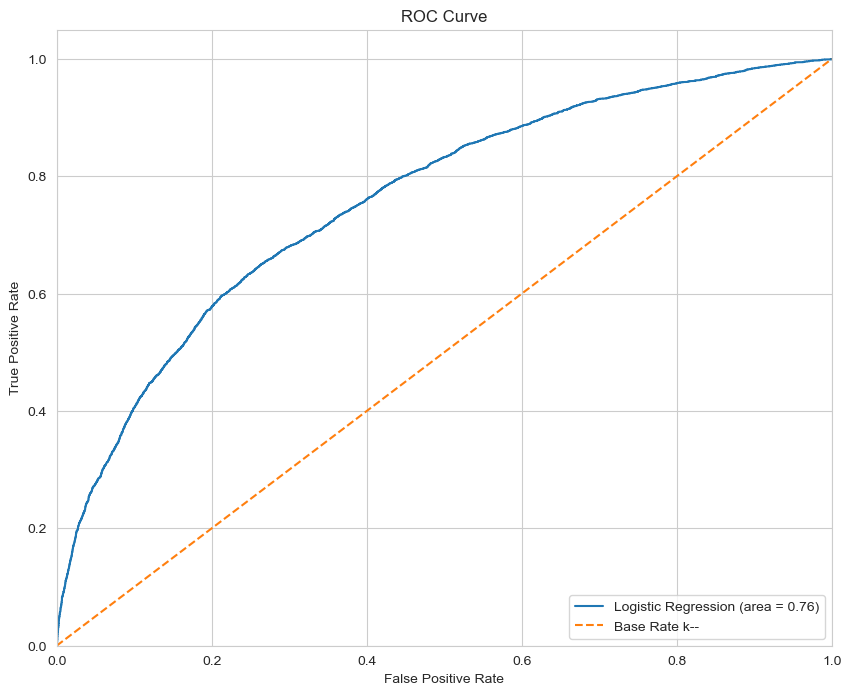

In [88]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, log_reg3.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_final)
plt.plot([0,1], [0,1],label='Base Rate k--', linestyle='--')

plt.gcf().set_size_inches(10, 8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [89]:
# Create a Random Forest Classifier Object
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=30)

# Fit Random Forest Classifier to training data
rf_clf1.fit(X_train_scaled, y_train)

# Make preditions on the test set
y_pred = rf_clf1.predict(X_test_scaled)

In [90]:
# Review performance metrics
print_score(rf_clf1, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(rf_clf1, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 99.70%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21837
           1       1.00      0.99      1.00     13163

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000

_______________________________________________
Confusion Matrix: 
 [[21811    26]
 [   80 13083]]

Testing Result:
Accuracy Score: 75.57%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      9359
           1       0.68      0.66      0.67      5641

    accuracy                           0.76     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.75      0.76      0.75     15000

_________________________

In [92]:
# Review ROC AUC score
rf_roc = roc_auc_score(y_test, rf_clf1.predict_proba(X_test_scaled)[:,1])
print("ROC AUC Score:", rf_roc)

ROC AUC Score: 0.8194587544874079


In [93]:
# Define the random forest hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

In [94]:
# Create a Random Forest Classifier Object
rf_clf2 = RandomForestClassifier(random_state=30)

# Use RandomizedSearchCV to perform a hyperparameter search
rf_cv = RandomizedSearchCV(
    estimator=rf_clf2, 
    scoring='accuracy',
    param_distributions=params_grid,
    n_iter=200,
    cv=5, 
    verbose=1, 
    random_state=30,
    n_jobs=-1
)

rf_cv.fit(X_train_scaled, y_train)

# Get best parameters
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params}")

# Train Random Foreset Classifier using best parameters and fit to model
rf_clf3 = RandomForestClassifier(**rf_best_params)
rf_clf3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 10, 'bootstrap': True}


RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=1600)

In [95]:
# Review performance metrics
print_score(rf_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(rf_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 81.05%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     21837
           1       0.78      0.69      0.73     13163

    accuracy                           0.81     35000
   macro avg       0.80      0.79      0.79     35000
weighted avg       0.81      0.81      0.81     35000

_______________________________________________
Confusion Matrix: 
 [[19279  2558]
 [ 4075  9088]]

Testing Result:
Accuracy Score: 78.47%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      9359
           1       0.75      0.65      0.69      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000

_________________________

In [96]:
# Review ROC AUC score
rf_roc_final = roc_auc_score(y_test, rf_clf3.predict_proba(X_test_scaled)[:,1])
print("ROC AUC Score:", rf_roc_final)

ROC AUC Score: 0.8470760540582182


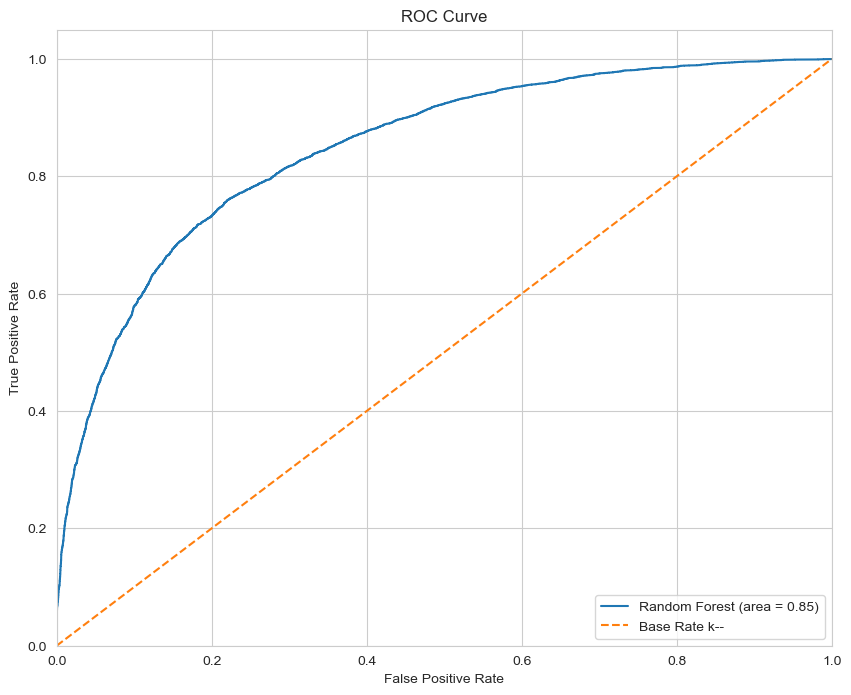

In [97]:
# Create ROC Graph
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_clf3.predict_proba(X_test_scaled)[:,1])
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_final)
plt.plot([0,1], [0,1],label='Base Rate k--', linestyle='--')

plt.gcf().set_size_inches(10, 8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Most Important Features of User Retention Based on Random Forest Model')

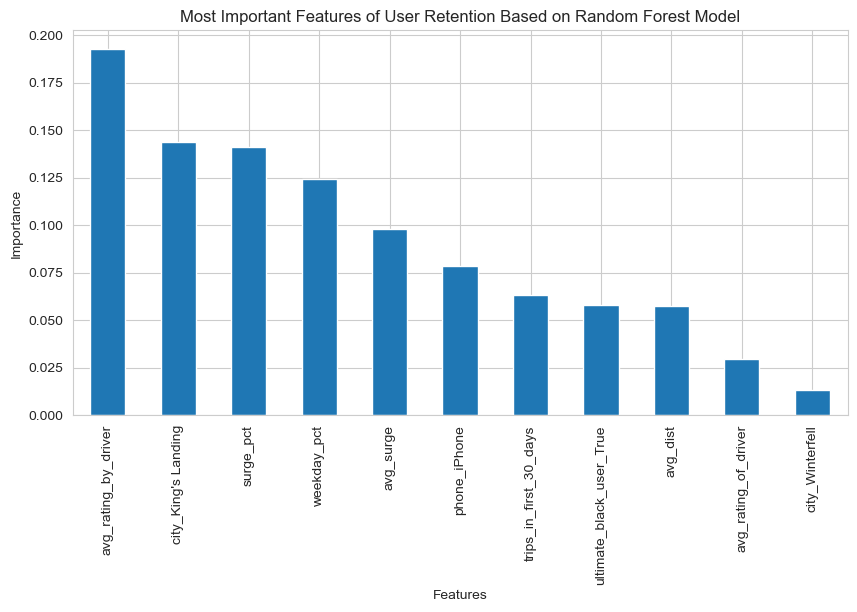

In [99]:
# Random Forest Feature Importance
plt.subplots(figsize=(10, 5))
imps = rf_cv.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Most Important Features of User Retention Based on Random Forest Model')

Top 5 Most Important Features of User Retention based on the Random Forest Classifier model were:
1. `avg_rating_by_driver`
2. `city_King's Landing`
3. `surge_pct`
4. `weekday_pct`
5. `avg_surge`

## Conclusion

To begin with in our initial exploratory data analysis, we discovered that **37.61%** of the observed users were retained after their 6th month on the system. Furthermore, our feature correlation assessment revealed that the only features with any relative correlation with user retention were if they were `ultimate_black_user` and `trips_in_first_30_days` ($r^2$ = 0.21). Although, it is worth noting that there was a strong correlation between surge percent and average surge. 

In this challenge, we built a supervised machine learning model to help Ultimate Inc. predict user retention. With that said, we used the logistic regression and random forest machine learning algorithms as binary classifiers for our models. With that said, we ultimately chose the random forest classifier as the final model for our prediction because it produced superior accuracy (78.47 % vs. 71.69%) and roc auc scores (84.70% vs. 75.82%) compared to the logistic regression model. The only concerns we may have had was potentially overfitting in the model and slightly class imbalance between retention vs non-retention users. However, our model still performed optimally despite these potential concerns with an accuracy of 78.5% and roc auc score of 84.7%.

The last objective of this challenge was to use the data to leverage insights gained from the model to help understand what factors are important predictors for long-term rider retention. With that in mind, the random forest classifier model was able to identify the most important indicators of user retention based on its feature importance analysis:
1. **`avg_rating_by_driver`:** the most important predictor of user retention was the rider's average rate by drivers, which suprisingly slightly negatively correlated with user retention. 
2. **`city_King's Landing`:** the next most significant indicator was for useres who signed up in the city of King's Landing.
3. **`surge_pct`:** the percent of trips taken with surge multiplier > 1 was also an important indicator. 

Some recommendations to operationalize these insights for Ultimate Inc. are:
- Encourage drivers to make riders feel more comfortable during the ride and not to inflate rider ratings, possibly offer incentive program rewarding good riders.
- Focus more marketing efforts in King's Landing, where users are more likely to be retained. 
- Try to limit or reduce usage of surge pricing.